In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [2]:
img1 = cv2.imread("img1.png")

In [3]:
ret, corners = cv2.findChessboardCorners(img1, (24, 17), None)

In [4]:
print(corners)

[[[ 394.29108  791.2645 ]]

 [[ 409.39203  791.1205 ]]

 [[ 424.80472  792.13873]]

 [[ 440.69943  792.08124]]

 [[ 456.7048   792.3981 ]]

 [[ 472.66364  792.6077 ]]

 [[ 488.99585  793.0634 ]]

 [[ 504.72165  793.3816 ]]

 [[ 520.64984  793.9748 ]]

 [[ 536.8101   793.58075]]

 [[ 552.8645   794.34845]]

 [[ 569.51587  794.2261 ]]

 [[ 585.81305  794.3726 ]]

 [[ 602.36743  794.50323]]

 [[ 618.67413  794.60077]]

 [[ 635.1011   794.7454 ]]

 [[ 651.7561   794.8676 ]]

 [[ 668.22064  794.746  ]]

 [[ 684.863    795.33777]]

 [[ 701.2876   794.8793 ]]

 [[ 718.12854  795.18536]]

 [[ 734.37115  794.8175 ]]

 [[ 751.09174  795.1148 ]]

 [[ 767.53766  794.75146]]

 [[ 394.3933   806.7959 ]]

 [[ 410.23233  807.5955 ]]

 [[ 425.4996   807.67175]]

 [[ 440.8316   808.3187 ]]

 [[ 456.8668   808.5438 ]]

 [[ 473.02594  808.7212 ]]

 [[ 488.84448  809.2431 ]]

 [[ 504.72482  809.916  ]]

 [[ 520.8891   809.5524 ]]

 [[ 536.9456   810.37744]]

 [[ 553.4509   810.29486]]

 [[ 569.70233  810.5

In [5]:
gray = cv2.cvtColor(img1 ,cv2.COLOR_BGR2GRAY)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)

In [6]:
final_pic = cv2.drawChessboardCorners(img1, (24,17), corners2, ret)

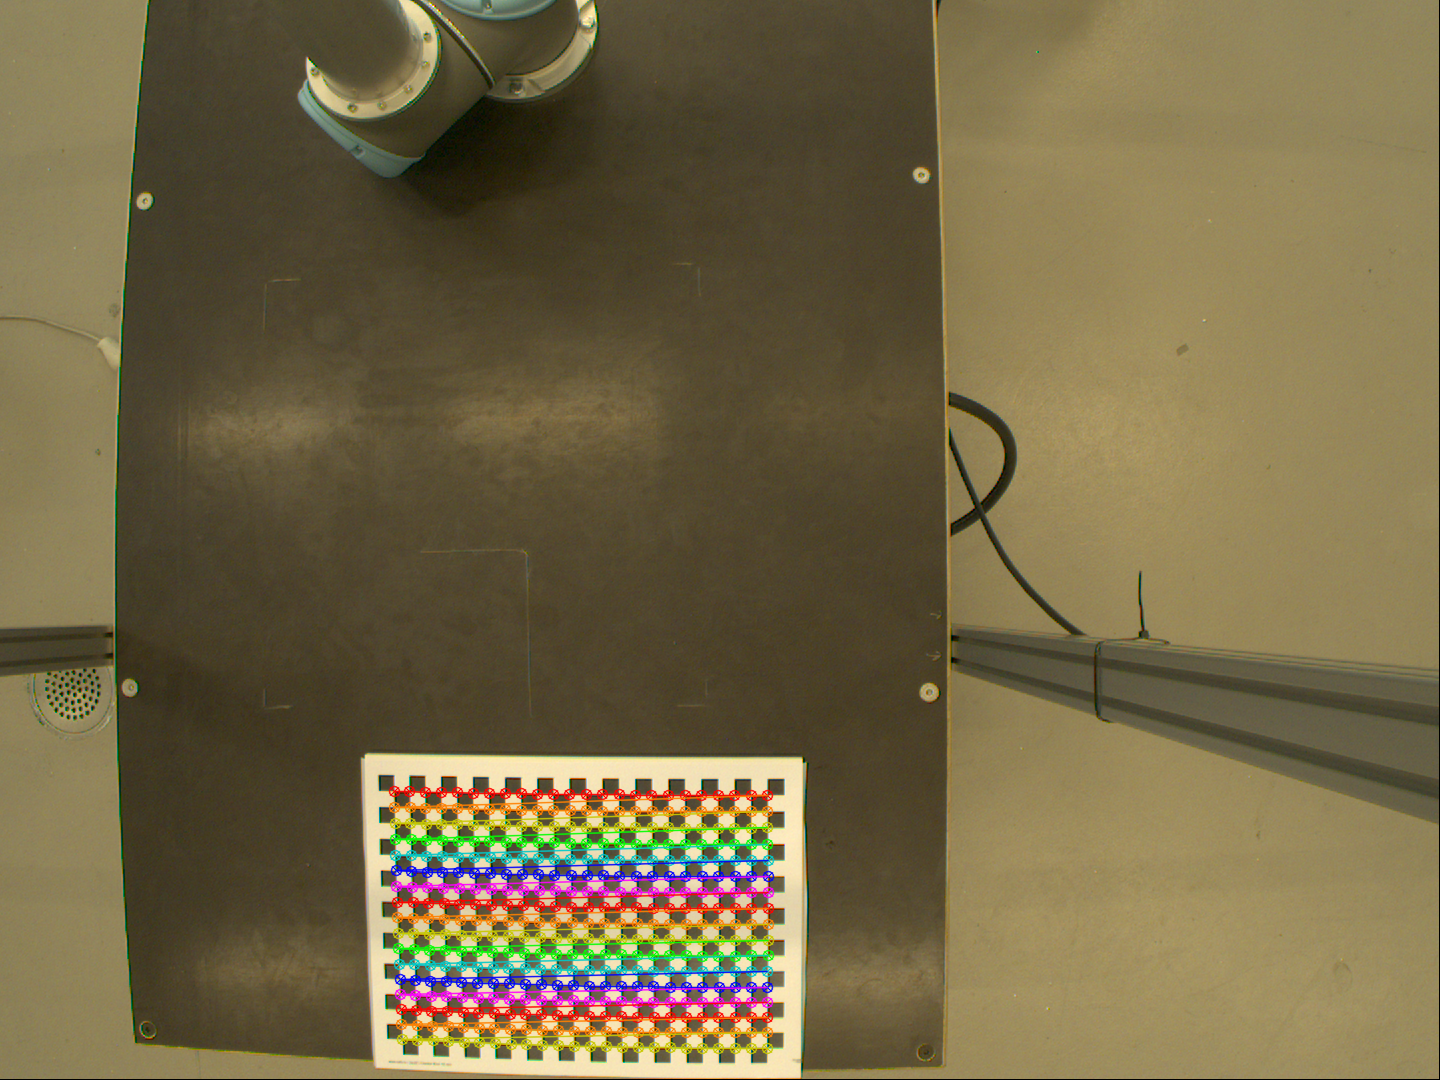

In [7]:
cv2_imshow(final_pic)

In [8]:
cv2.imwrite('4_3.png', final_pic)

True

In [9]:
objectP = np.zeros((24*17,3), np.float32)
objectP[:,:2] = np.mgrid[0:24,0:17].T.reshape(-1,2)
objectPoints = []
imagePoints = []
imagePoints.append(corners2)
objectPoints.append(objectP)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objectPoints, imagePoints, img1.shape[1::-1], None, None)
print('ret =', ret)
print('camera matrix =' , mtx)
print('dist coefficience =' , dist)
print('rotation vectors =' , rvecs)
print('translation vectors =' , tvecs)

ret = 0.22975377370728495
camera matrix = [[1.00520523e+03 0.00000000e+00 7.91264339e+02]
 [0.00000000e+00 1.01544867e+03 5.20980956e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist coefficience = [[-0.20625468  0.1989532  -0.00082261 -0.01649139 -0.18016533]]
rotation vectors = (array([[-0.02364562],
       [ 0.03777226],
       [-0.00948411]]),)
translation vectors = (array([[-24.33164186],
       [ 16.51999428],
       [ 60.43366947]]),)


In [10]:
print('k1 =', dist[0][0])
print('k2 =', dist[0][1])
print('k3 =', dist[0][4])
print('p1 =', dist[0][2])
print('p2 =', dist[0][3])

k1 = -0.20625468217645052
k2 = 0.1989532000635177
k3 = -0.18016533305335386
p1 = -0.0008226067014379251
p2 = -0.01649139004542897


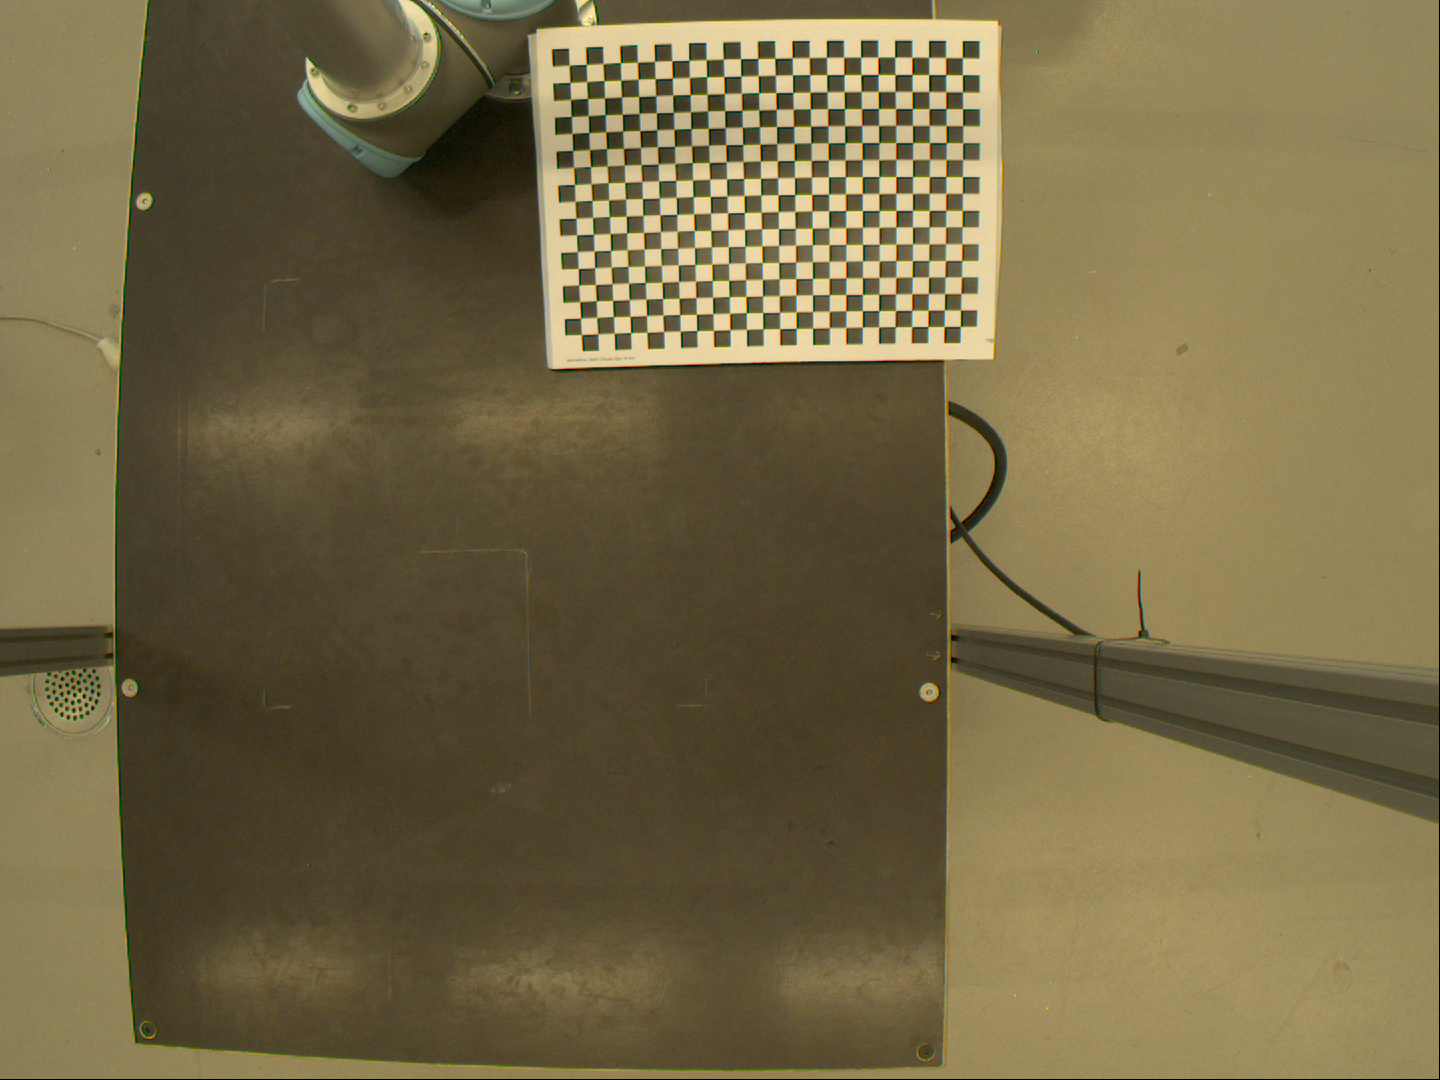

In [11]:
img5 = cv2.imread('img5.png')
cv2_imshow(img5)

In [12]:
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, img5.shape[1::-1], 0, img5.shape[1::-1])

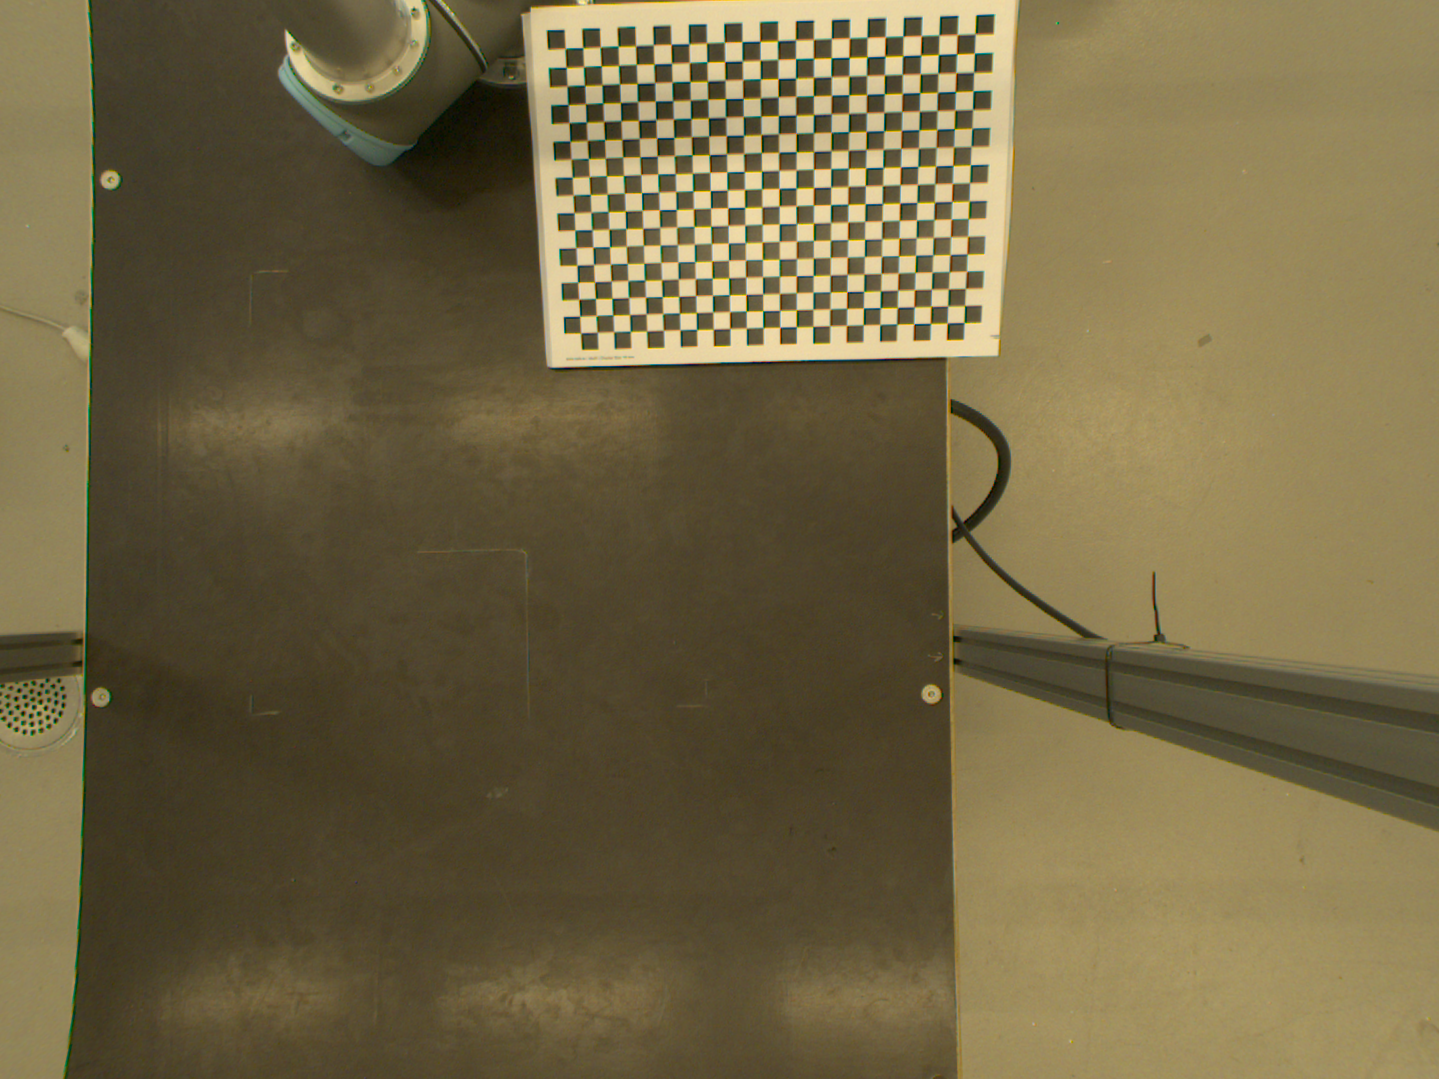

True

In [13]:
dst = cv2.undistort(img5, mtx, dist, None, newcameramtx)
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow(dst)
cv2.imwrite('4_6.png', dst)

In [14]:
img1 = cv2.imread('img1.png')
img2 = cv2.imread('img2.png')
img3 = cv2.imread('img3.png')
img4 = cv2.imread('img4.png')
img5 = cv2.imread('img5.png')
images = [img1, img2, img3, img4]

In [15]:
objPoints = []
imgPoints = []
objectP2 = np.zeros((17*24,3), np.float32)
objectP2[:,:2] = np.mgrid[0:17,0:24].T.reshape(-1,2)

In [22]:
for image in images:
    ret, corners = cv2.findChessboardCorners(image, (24,17))
    if ret == True:
        objPoints.append(objectP)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgPoints.append(corners2)

In [23]:
ret, corners = cv2.findChessboardCorners(img2, (17,24))

In [24]:
objPoints.append(objectP2)
gray = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
imgPoints.append(corners2)

In [25]:
ret2, mtx3, dist2, rvecs2, tvecs2 = cv2.calibrateCamera(objPoints, imgPoints, img1.shape[1::-1], None, None)

In [26]:
mtx4, roi = cv2.getOptimalNewCameraMatrix(mtx3, dist2, img1.shape[1::-1], 0, img1.shape[1::-1])

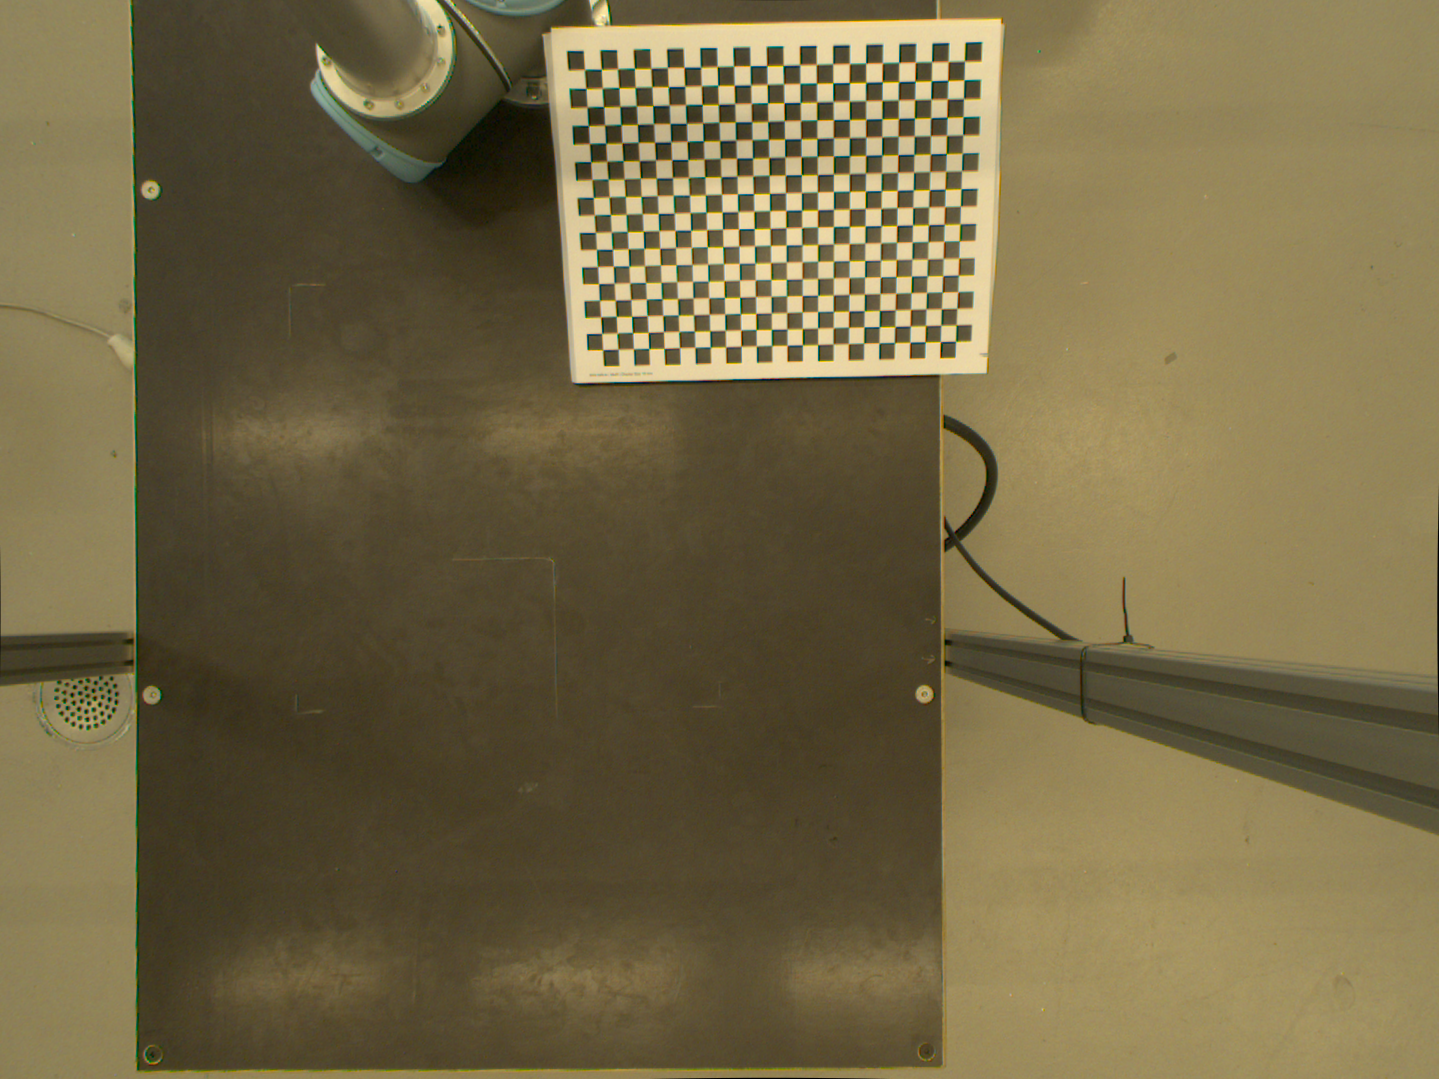

True

In [27]:
dst = cv2.undistort(img5, mtx3, dist2, None, mtx4)
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2_imshow(dst)
cv2.imwrite('4_7.png', dst)